Bu çalışmada boy ve kilo verilerine göre cinsiyet tahmini yapılmaktadır. KNN algoritması kullanılmıştır.

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv


In [47]:
data = pd.read_csv('/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv',encoding='ISO-8859-1')

In [48]:
data.drop("Index" , axis = 1 , inplace = True)

In [49]:
data.Gender = [1 if each == "Male" else 0 for each in data.Gender]

In [50]:
y = data.Gender.values
x_data = data.drop("Gender" , axis =1 )
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [51]:
data.head()

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61


In [52]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

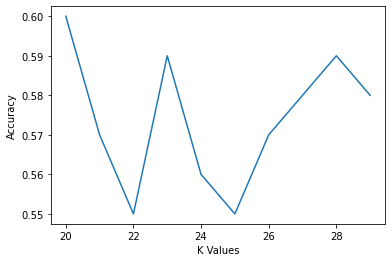

In [53]:
score_list = []
for each in range(20,30):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train , y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(20,30),score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

In [54]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train , y_train)
pred = knn.predict(x_test)
print("{} nn skoru {}".format(20,knn.score(x_test,y_test)))

20 nn skoru 0.6
